In [1]:
import glob
import matplotlib as mpl
import matplotlib.colors 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import scipy.optimize as spopt

import populationevolution as popev
import SweepApproximationFunctions as SAF
import sweep_approx_compare_to_full_sim as sactfs

np.random.seed(42)
plt.style.use(('C:\\Users\\Nicholas Sherer\\.matplotlib\\Sherer_Thesis.mplstyle'))
%matplotlib inline

In [2]:
cd Thesis_Data_and_Figures

E:\Documents\Python Evolution Simulation\Population Evolution Project Source Code\Thesis_Data_and_Figures


# Plots of the steady state approximation to the fitness and mutation rate distribution of the population and comparison to full simulation

In [3]:
params = {'mu_min': .01, 'delta_f': .02, 'M': 3, 'P_mu': .1, 'K': 10**6}
mu_list, f_list, Neq, deltaNs = sactfs.compareNeq_Ntrue(**params,t=10**5)

In [4]:
def logNbarplot(ax, mu, f, N):
    xmesh, ymesh = np.meshgrid(np.arange(mu.size),-np.arange(f.size))
    xmesh = xmesh.ravel()
    ymesh = ymesh.ravel()
    logN = np.maximum(0,np.log(N.flatten()))
    bottom = np.zeros_like(logN)
    width=1
    depth=1
    ax.bar3d(xmesh, ymesh, bottom, width, depth, logN, shade=True);
    ax.view_init(elev = 45, azim=-45);
    ax.set_xticklabels('{:2g}'.format(m) for m in mu);
    ax.set_yticks(-np.arange(f.size))
    ax.set_yticklabels(['{:2g}'.format(f_) for f_ in f], fontsize='medium')
    zticks = ax.get_zticks()
    ax.set_zticklabels('{0:.2g}'.format(np.exp(v)) for v in zticks)
    
def Nbarplot(ax, mu, f, N):
    xmesh, ymesh = np.meshgrid(np.arange(mu.size),-np.arange(f.size))
    xmesh = xmesh.ravel()
    ymesh = ymesh.ravel()
    N_ = N.flatten()
    bottom = np.zeros_like(N_)
    width=1
    depth=1
    ax.bar3d(xmesh, ymesh, bottom, width, depth, N_, shade=True);
    ax.view_init(elev = 45, azim=-45);
    ax.set_xticklabels('{:2g}'.format(m) for m in mu);
    ax.set_yticks(-np.arange(f.size))
    ax.set_yticklabels(['{:2g}'.format(f_) for f_ in f], fontsize='medium')

# class below shamelessly copied from https://matplotlib.org/users/colormapnorms.html
class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
    
def Ncolormesh(fig, ax, mu, f, N, cmap='PiYG'):
    pcm = ax.pcolormesh(N, cmap=cmap, norm=MidpointNormalize(midpoint=0), edgecolors='k')
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_xticklabels('{:2g}'.format(m) for m in mu)
    ax.set_yticks(np.arange(f.size))
    ax.set_yticklabels(['{:2g}'.format(f_) for f_ in f])
    fig.colorbar(pcm)

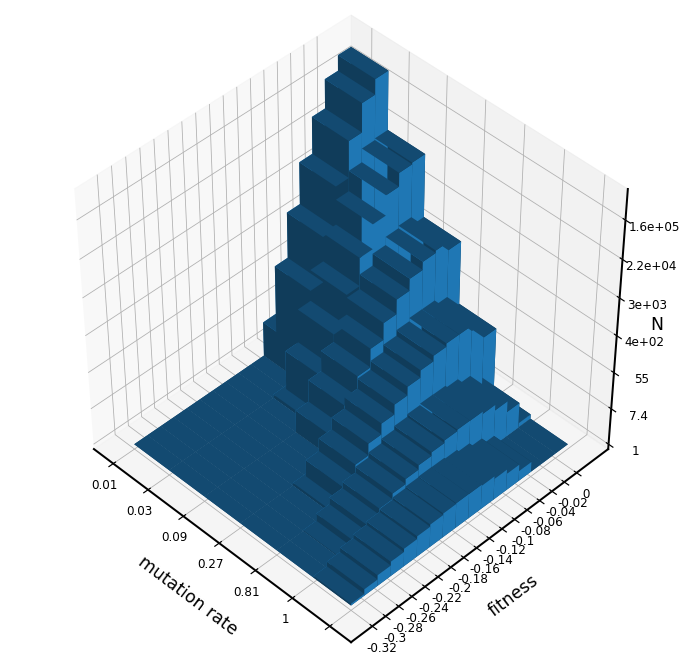

In [5]:
fig = plt.figure(figsize=(12,12));
ax = fig.add_subplot(111, projection='3d');
logNbarplot(ax, mu_list, f_list[:17], Neq[:17,:]);
ax.set_xlabel('mutation rate', labelpad=20);
ax.set_ylabel('fitness', labelpad=20);
ax.set_zlabel('N');
ax.tick_params(axis="z",direction="out", pad=10);
ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('Neq_approx.pdf')

E:\Anaconda3\envs\imageprocessing_windows\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


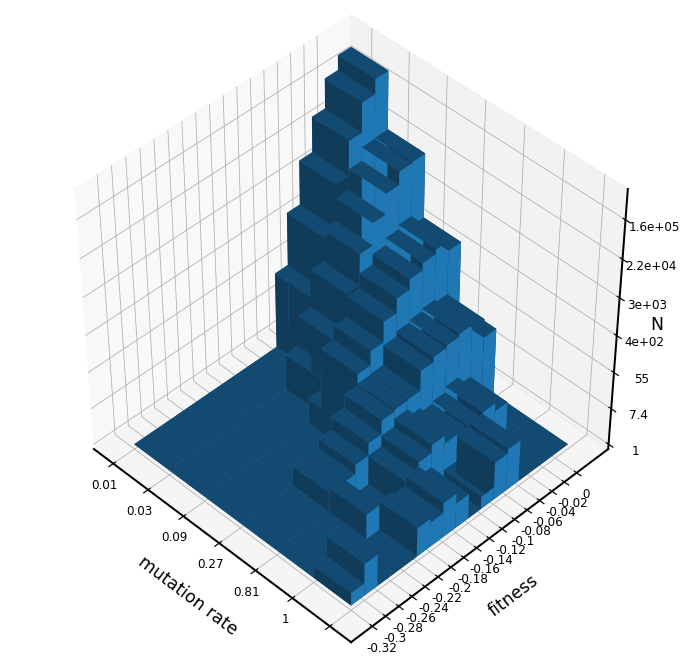

In [6]:
fig = plt.figure(figsize=(12,12));
ax = fig.add_subplot(111, projection='3d');
logNbarplot(ax, mu_list, f_list[:17], (Neq+deltaNs[100])[:17,:]);
ax.set_xlabel('mutation rate', labelpad=20);
ax.set_ylabel('fitness', labelpad=20);
ax.set_zlabel('N');
ax.tick_params(axis="z",direction="out", pad=10);
ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('Neq_sampletime.pdf')

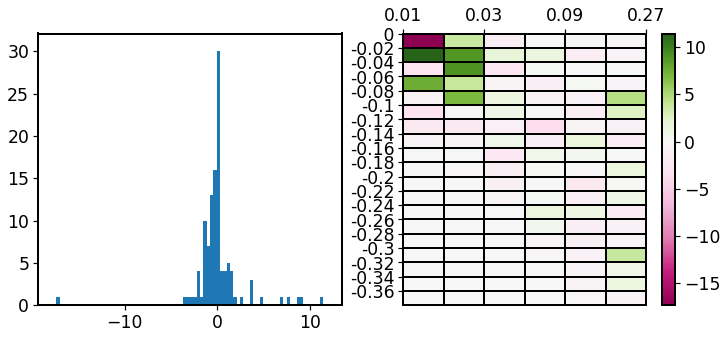

In [7]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
sample = 100
axes[0].hist(sactfs.delta_over_std(Neq[:19,:], deltaNs[100][:19,:]).flatten())
Ncolormesh(fig, axes[1], mu_list, f_list[:19], sactfs.delta_over_std(Neq[:19,:], deltaNs[100][:19,:]))

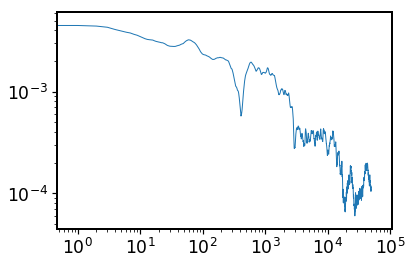

In [8]:
plt.loglog(sactfs.mean_probability_error(deltaNs[50000:], params['K']),marker='',linewidth='1')

In [9]:
params = {'mu_min': .01, 'delta_f': .02, 'M': 3, 'P_mu': .1, 'K': 10**6}
results_by_K = {}
Ks = 10**np.arange(3,10,dtype='int')
for K in Ks:
    params['K']=K
    results_by_K[K]={}
    mu_list, f_list, Neq, deltaNs = sactfs.compareNeq_Ntrue(**params,t=10**5)
    results_by_K[K]['mus']=mu_list
    results_by_K[K]['fs']=f_list
    results_by_K[K]['Neq']=Neq
    results_by_K[K]['deltaNs']=deltaNs

In [10]:
errors_by_K = np.zeros_like(Ks,dtype='float64')
for i,K in enumerate(Ks):
    dNs = results_by_K[K]['deltaNs']
    err = sactfs.mean_probability_error(dNs[50000:],K)
    errors_by_K[i]=err[-1]

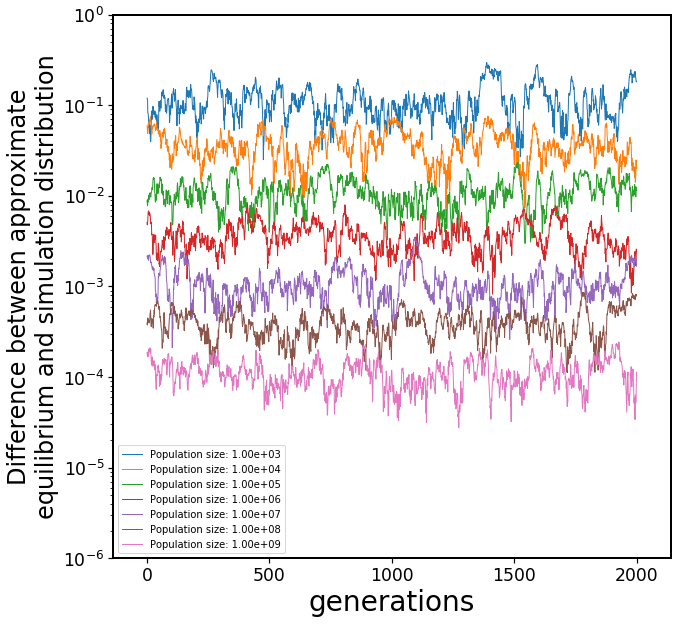

In [11]:
plt.figure(figsize=(10,10))
for K in Ks:
    dNs = results_by_K[K]['deltaNs']
    diff = np.sum(np.abs(dNs),axis=(1,2))/(2*K)
    plt.semilogy(diff[50000:52000], marker='', linewidth=1, label='Population size: {:.2e}'.format(K))
plt.legend()
plt.ylim(10**-6,1)
plt.xlabel('generations', fontsize=28)
plt.ylabel('Difference between approximate\nequilibrium and simulation distribution', fontsize=24)
plt.savefig('deltaN_vs_t.pdf')

In [12]:
def power_law(x, A, beta):
    return A*x**beta
err_power_fit = spopt.curve_fit(power_law, Ks, errors_by_K, sigma=errors_by_K, p0=(.3,-.5))

In [13]:
print('The coefficient and exponent are:', err_power_fit[0])
print('The uncertainty in these estimates are:', np.sqrt(err_power_fit[1][0,0]), np.sqrt(err_power_fit[1][1,1]))

The coefficient and exponent are: [ 0.28144701 -0.53887701]
The uncertainty in these estimates are: 0.2120184106574118 0.05130676457824669


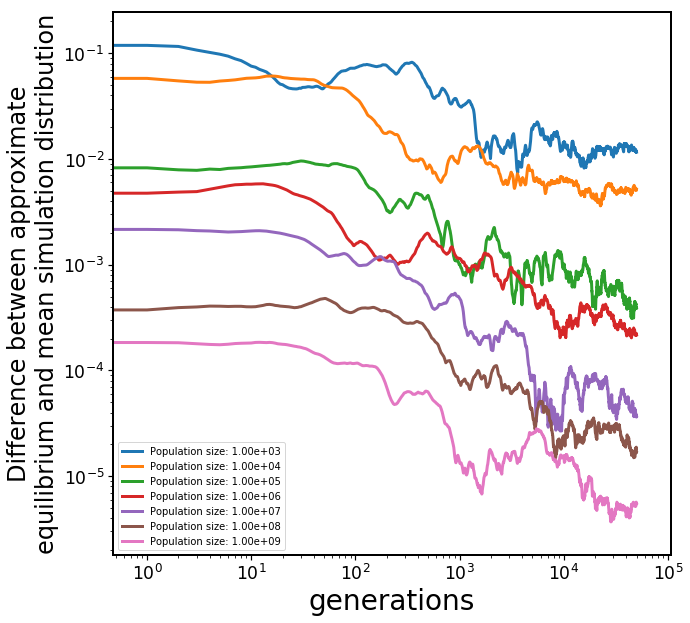

In [14]:
plt.figure(figsize=(10,10))
for K in Ks:
    dNs = results_by_K[K]['deltaNs']
    plt.loglog(sactfs.mean_probability_error(dNs[50000:],K),marker='',label='Population size: {:.2e}'.format(K))
plt.legend()
plt.xlabel('generations', fontsize=28)
plt.ylabel('Difference between approximate\nequilibrium and mean simulation distribution', fontsize=24)
plt.savefig('mean_deltaN_vs_t.pdf')

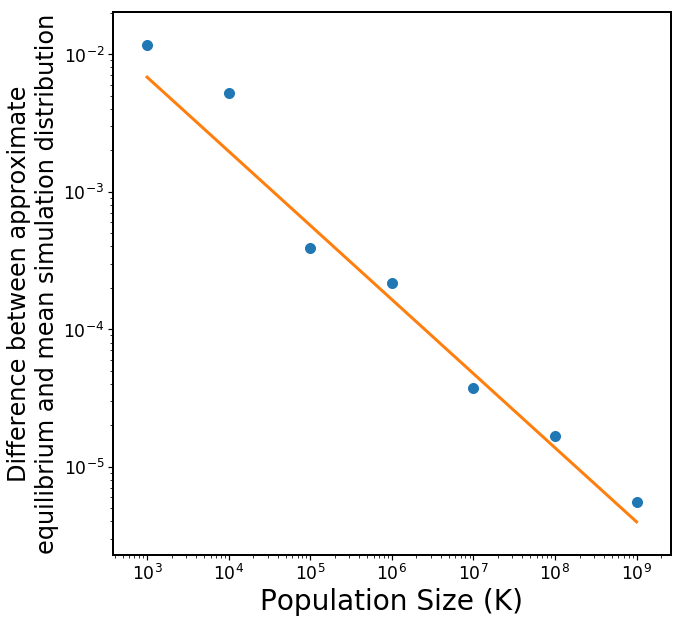

In [15]:
plt.figure(figsize=(10,10))
plt.loglog(Ks,errors_by_K,linestyle='')
plt.loglog(Ks,power_law(Ks,*err_power_fit[0]),marker='')
plt.xlabel('Population Size (K)', fontsize=28)
plt.ylabel('Difference between approximate\nequilibrium and mean simulation distribution', fontsize=24)
plt.savefig('mean_deltaN_vs_K.pdf')

# Plots of the approximation for the fixation probability and comparison to full simulation

In [16]:
fvary_params = []
for i in  np.arange(1,11)*.005:
    mu_min = .005
    delta_f = np.log(1+i)
    M=4
    P_mu = .1
    K = 10**6
    fvary_params.append([mu_min, delta_f, M, P_mu, K])
fvary_invasion_results = []
for params in fvary_params:
    invasion_results = {}
    test_count, fixations, fixation_times, extinction_times = sactfs.estimate_fix_prob(*params, 1, 0)
    invasion_results['test_count']=test_count
    invasion_results['fixations']=fixations
    invasion_results['fixation_times']=fixation_times
    invasion_results['extinction_times']=extinction_times
    fvary_invasion_results.append(invasion_results)

E:\Anaconda3\envs\imageprocessing_windows\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [17]:
antimu_params = []
for i in np.arange(1,11)*.005:
    delta_f = .02
    M=4
    P_mu = .1
    K = 10**6
    mu_min = i/(1+i-1/M)
    antimu_params.append([mu_min, delta_f, M, P_mu, K])
antimu_invasion_results = []
for params in antimu_params:
    invasion_results = {}
    test_count, fixations, fixation_times, extinction_times = sactfs.estimate_fix_prob(*params, 0, -1)
    invasion_results['test_count']=test_count
    invasion_results['fixations']=fixations
    invasion_results['fixation_times']=fixation_times
    invasion_results['extinction_times']=extinction_times
    antimu_invasion_results.append(invasion_results)

In [18]:
mutator2_params = []
for i in np.arange(1,11)*.005:
    frac = .97
    delta_f = np.log((1+i)/frac)
    M=2
    P_mu = .1
    K = 10**6
    mu_min = (1 - frac)/(M - frac)
    mutator2_params.append([mu_min, delta_f, M, P_mu, K])
mutator2_invasion_results = []
for params in mutator2_params:
    invasion_results = {}
    test_count, fixations, fixation_times, extinction_times = sactfs.estimate_fix_prob(*params, 1, 1)
    invasion_results['test_count']=test_count
    invasion_results['fixations']=fixations
    invasion_results['fixation_times']=fixation_times
    invasion_results['extinction_times']=extinction_times
    mutator2_invasion_results.append(invasion_results)

In [19]:
mutator10_params = []
for i in np.arange(1,11)*.005:
    frac=.99
    delta_f = np.log((1+i)/frac)
    M=10
    P_mu = .1
    K = 10**6
    mu_min = (1-frac)/(M-frac)
    mutator10_params.append([mu_min, delta_f, M, P_mu, K])
mutator10_invasion_results = []
for params in mutator2_params:
    invasion_results = {}
    test_count, fixations, fixation_times, extinction_times = sactfs.estimate_fix_prob(*params, 1, 1)
    invasion_results['test_count']=test_count
    invasion_results['fixations']=fixations
    invasion_results['fixation_times']=fixation_times
    invasion_results['extinction_times']=extinction_times
    mutator10_invasion_results.append(invasion_results)

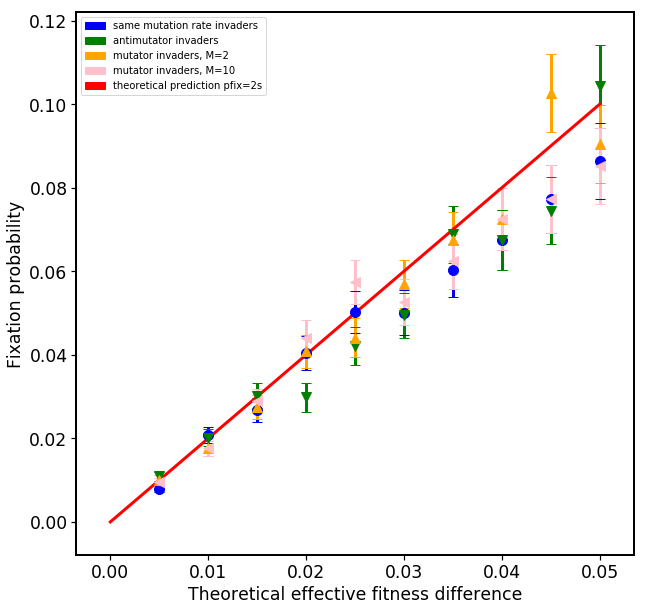

In [20]:
plt.figure(figsize=(10,10))
for params, results in zip(fvary_params,fvary_invasion_results):
    delta_f = params[1]
    s = np.exp(delta_f)-1
    N = results['test_count']
    p = results['fixations']/results['test_count']
    err = np.sqrt(p*N*(1-p))/N
    plt.errorbar(s, p, err, capsize=5, color='blue', marker='o')
for params, results in zip(antimu_params,antimu_invasion_results):
    mu_min = params[0]
    M = params[2]
    s = (1-mu_min/M)/(1-mu_min)-1
    N = results['test_count']
    p = results['fixations']/results['test_count']
    err = np.sqrt(p*N*(1-p))/N
    plt.errorbar(s, p, err, capsize=5, color='green', marker='v')
for params, results in zip(mutator2_params,mutator2_invasion_results):
    mu_min = params[0]
    delta_f = params[1]
    M = params[2]
    s = np.exp(delta_f)*(1-M*mu_min)/(1-mu_min)-1
    N = results['test_count']
    p = results['fixations']/results['test_count']
    err = np.sqrt(p*N*(1-p))/N
    plt.errorbar(s, p, err, capsize=5, color='orange', marker='^')
for params, results in zip(mutator10_params,mutator10_invasion_results):
    mu_min = params[0]
    delta_f = params[1]
    M = params[2]
    s = np.exp(delta_f)*(1-M*mu_min)/(1-mu_min)-1
    N = results['test_count']
    p = results['fixations']/results['test_count']
    err = np.sqrt(p*N*(1-p))/N
    plt.errorbar(s, p, err, capsize=5, color='pink', marker='<')
x = np.linspace(0,.05)
plt.plot(x,2*x,color='red',marker='')
plt.xlabel('Theoretical effective fitness difference')
plt.ylabel('Fixation probability')
delta_f_only_patch = mpl.patches.Patch(color='blue', label='same mutation rate invaders')
antimutator_patch = mpl.patches.Patch(color='green', label='antimutator invaders')
mutator2_patch = mpl.patches.Patch(color='orange', label='mutator invaders, M=2')
mutator10_patch = mpl.patches.Patch(color='pink', label='mutator invaders, M=10')
theoretical_patch = mpl.patches.Patch(color='red', label='theoretical prediction pfix=2s')
plt.legend(handles=[delta_f_only_patch, antimutator_patch, mutator2_patch, mutator10_patch, theoretical_patch])
plt.savefig('fixation_probability.pdf')

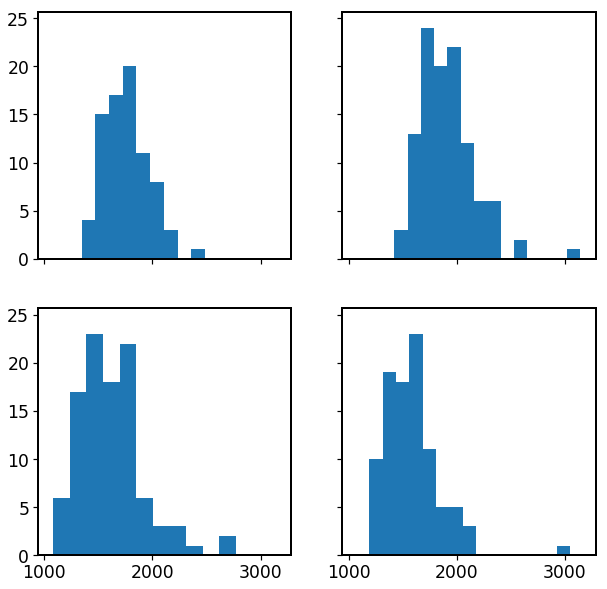

In [21]:
fig, ax = plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
ax[0,0].hist(fvary_invasion_results[0]['fixation_times']);
ax[0,1].hist(antimu_invasion_results[0]['fixation_times']);
ax[1,0].hist(mutator2_invasion_results[0]['fixation_times']);
ax[1,1].hist(mutator10_invasion_results[0]['fixation_times']);

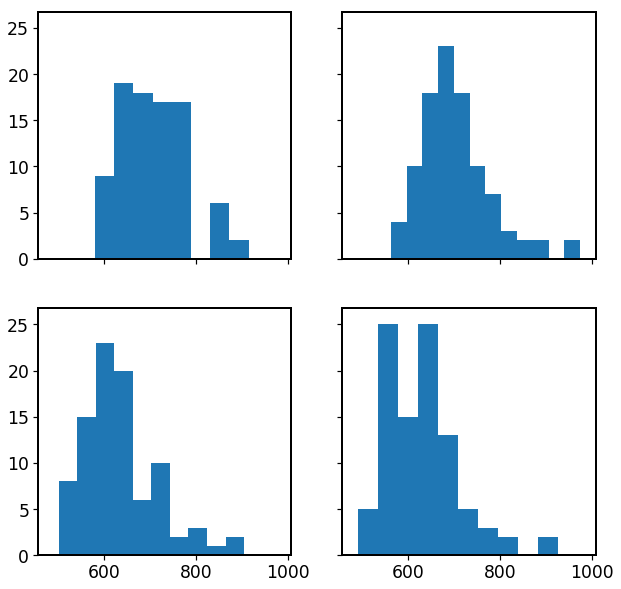

In [22]:
fig, ax = plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
ax[0,0].hist(fvary_invasion_results[2]['fixation_times']);
ax[0,1].hist(antimu_invasion_results[2]['fixation_times']);
ax[1,0].hist(mutator2_invasion_results[2]['fixation_times']);
ax[1,1].hist(mutator10_invasion_results[2]['fixation_times']);

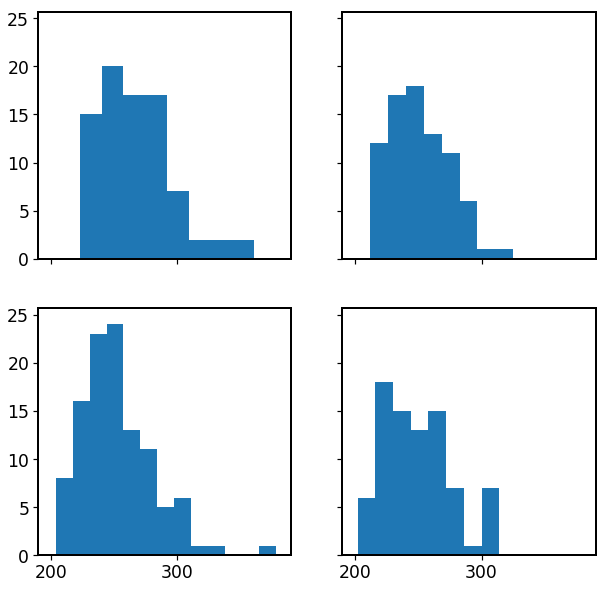

In [23]:
fig, ax = plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
ax[0,0].hist(fvary_invasion_results[8]['fixation_times']);
ax[0,1].hist(antimu_invasion_results[8]['fixation_times']);
ax[1,0].hist(mutator2_invasion_results[8]['fixation_times']);
ax[1,1].hist(mutator10_invasion_results[8]['fixation_times']);

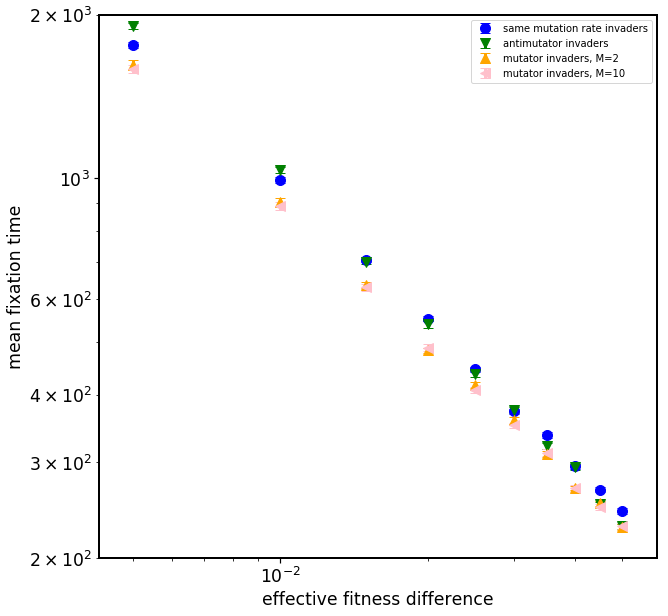

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
c=True
for params, results in zip(fvary_params,fvary_invasion_results):
    delta_f = params[1]
    s = np.exp(delta_f)-1
    t_fix = np.mean(results['fixation_times'])
    t_fix_std = np.std(results['fixation_times'])/len(results['fixation_times'])**.5
    if c:
        ax.errorbar(s, t_fix, t_fix_std, capsize=5, color='blue', marker='o', linestyle='',
                    label='same mutation rate invaders')
        c=False
    else:
        ax.errorbar(s, t_fix, t_fix_std, capsize=5, color='blue', marker='o')
c=True
for params, results in zip(antimu_params,antimu_invasion_results):
    mu_min = params[0]
    M = params[2]
    s = (1-mu_min/M)/(1-mu_min)-1
    t_fix = np.mean(results['fixation_times'])
    t_fix_std = np.std(results['fixation_times'])/len(results['fixation_times'])**.5
    if c:
        ax.errorbar(s, t_fix, t_fix_std, capsize=5, color='green', marker='v', linestyle='',
                    label='antimutator invaders')
        c=False
    else:
        ax.errorbar(s, t_fix, t_fix_std, capsize=5, color='green', marker='v')
c=True
for params, results in zip(mutator2_params,mutator2_invasion_results):
    mu_min = params[0]
    delta_f = params[1]
    M = params[2]
    s = np.exp(delta_f)*(1-M*mu_min)/(1-mu_min)-1
    t_fix = np.mean(results['fixation_times'])
    t_fix_std = np.std(results['fixation_times'])/len(results['fixation_times'])**.5
    if c:
        ax.errorbar(s, t_fix, t_fix_std, capsize=5, color='orange', marker='^', linestyle='',
                    label='mutator invaders, M=2')
        c=False
    else:
        ax.errorbar(s, t_fix, t_fix_std, capsize=5, color='orange', marker='^')
c=True
for params, results in zip(mutator10_params,mutator10_invasion_results):
    mu_min = params[0]
    delta_f = params[1]
    M = params[2]
    s = np.exp(delta_f)*(1-M*mu_min)/(1-mu_min)-1
    t_fix = np.mean(results['fixation_times'])
    t_fix_std = np.std(results['fixation_times'])/len(results['fixation_times'])**.5
    if c:
        ax.errorbar(s, t_fix, t_fix_std, capsize=5, color='pink', marker='<', linestyle='',
                    label='mutator invaders, M=10')
        c=False
    else:
        ax.errorbar(s, t_fix, t_fix_std, capsize=5, color='pink', marker='<')
ax.set_yscale('log');
ax.set_xscale('log');
ax.set_ylim(200,2000);
ax.set_xlabel('effective fitness difference');
ax.set_ylabel('mean fixation time');
ax.legend();
plt.savefig('mean_fixation_times.pdf')

In [25]:
cd ..

E:\Documents\Python Evolution Simulation\Population Evolution Project Source Code


# Plots of typical paths of the mode of the mutation rate and fitness over time.

In [26]:
sweeps_p0 = []
sweeps_p1 = []
sweeps_p2 = []

sweeps_p0.append(popev.PopulationReader('sweep_sim2datetime.datetime(2019, 4, 13, 10, 46, 22, 798327).hdf5'))
for file in glob.glob('sweep_sim_p0*2019, 5, 31, *.hdf5'):
    sweeps_p0.append(popev.PopulationReader(file))
for file in glob.glob('sweep_sim_p1*2019, 5, 31, *.hdf5'):
    sweeps_p1.append(popev.PopulationReader(file))
for file in glob.glob('sweep_sim_p2*2019, 5, 31, *.hdf5'):
    sweeps_p2.append(popev.PopulationReader(file))

In [27]:
def params_string(run):
    delta_f = run.delta_fitness
    M = run.mu_multiple
    p_b = run.fraction_beneficial
    p_a = run.fraction_accurate
    P_mu = run.fraction_mu2mu
    K = run.pop_cap
    s = 'delta_f: {}, M: {}, p_b: {}, p_a: {}, P_mu: {}, K: {}'.format(delta_f, M, p_b, p_a, P_mu, K)
    return s

print('example1 has params '+params_string(sweeps_p0[0]) + '.')
print('example2 has params '+params_string(sweeps_p1[0]) + '.')
print('example3 has params '+params_string(sweeps_p2[0]) + '.')

example1 has params delta_f: 0.04, M: 2, p_b: 1e-06, p_a: 2e-06, P_mu: 0.3, K: 21000.
example2 has params delta_f: 0.03, M: 4, p_b: 1e-06, p_a: 1e-06, P_mu: 0.1, K: 58000.
example3 has params delta_f: 0.05, M: 8, p_b: 1e-07, p_a: 3e-08, P_mu: 0.05, K: 630000.


In [28]:
cd Thesis_Data_and_Figures/

E:\Documents\Python Evolution Simulation\Population Evolution Project Source Code\Thesis_Data_and_Figures


In [29]:
def fmu_mode_trajectory(run):
    fmu_pairs = np.transpose(np.array([run.mode_fitness[:], run.mode_mutation_rate[:]]))
    return sactfs.value_array_to_waiting_times(fmu_pairs)

trajs_p0 = []
for run in sweeps_p0:
    try:
        traj = fmu_mode_trajectory(run)
        trajs_p0.append(traj)
    except KeyError:
        pass

trajs_p1 = []
for run in sweeps_p1:
    try:
        traj = fmu_mode_trajectory(run)
        trajs_p1.append(traj)
    except KeyError:
        pass

trajs_p2 = []
for run in sweeps_p2:
    try:
        traj = fmu_mode_trajectory(run)
        trajs_p2.append(traj)
    except KeyError:
        pass

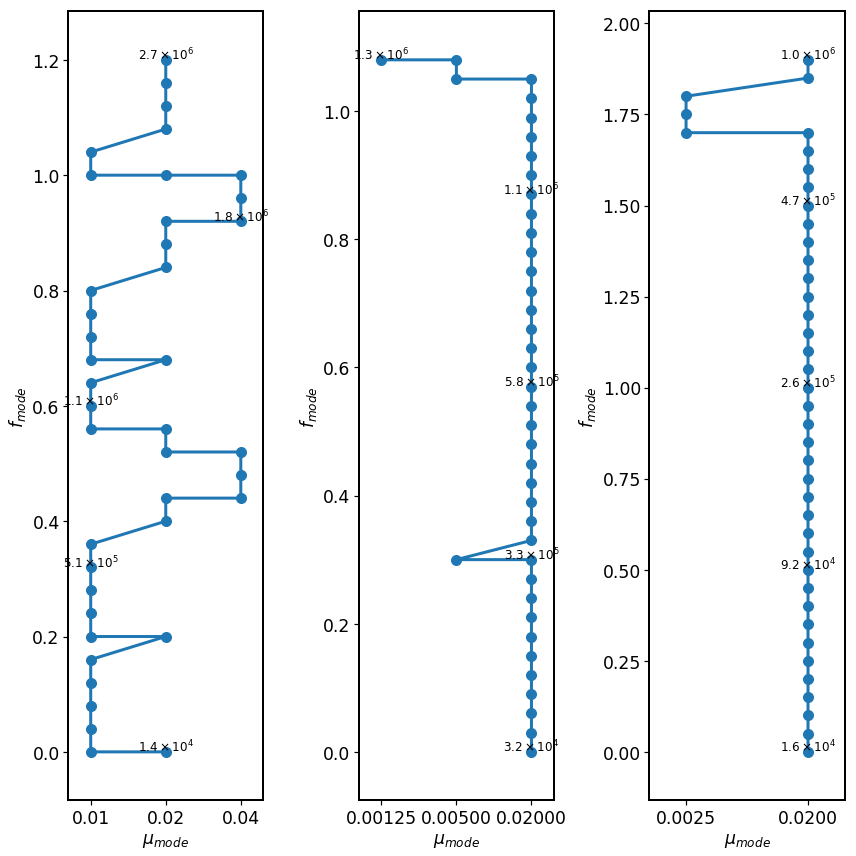

In [30]:
def int_to_tex(x, prec=1, upper_bound=999):
    if np.abs(x) > upper_bound:
        loglead, exp = np.modf(np.log10(x))
        lead = 10**loglead
        exp = int(exp)
        return "${0:.{2}f} \\times 10^{{{1}}}$".format(lead,exp,prec)
    else:
        return "{0:d}".format(x, prec)

def plot_mufpath(ax, fmu, tau, line_params=None, text_params=None):
    if line_params is None:
        line_params={'marker': 'o'}
    if text_params is None:
        text_params={'size': 'large', 'ha': 'center'}
    ax.plot(fmu[:,1],fmu[:,0],**line_params)
    mus = np.unique(fmu[:,1])
    M = mus[-1]/mus[-2]
    ax.set_xlim(mus[0]/(M**.3),mus[-1]*M**.3)
    ax.set_xscale('log')
    ax.minorticks_off()
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xticks(np.unique(fmu[:,-1]))
    ax.set_xlabel('$\mu_{mode}$')
    ax.set_ylabel('$f_{mode}$')
    for i, j, s in zip(fmu[:,1][::10],fmu[:,0][::10],np.cumsum(tau)[::10]):
        ax.text(i,j,int_to_tex(s, 1, 999), **text_params)
    ax.text(fmu[-1,1], fmu[-1,0],int_to_tex(np.cumsum(tau)[-1]), **text_params)

fig, axes = plt.subplots(1, 3, figsize=(12,12))
plot_mufpath(axes[0], trajs_p0[0][0][:40], trajs_p0[0][1][:40])
plot_mufpath(axes[1], trajs_p1[0][0][:40], trajs_p1[0][1][:40])
plot_mufpath(axes[2], trajs_p2[2][0][:40], trajs_p2[2][1][:40])
fig.tight_layout()
plt.savefig('sweep_muf_trajectories.pdf')

In [31]:
for run in sweeps_p2:
    print(len(run))

88711501
100000000
100000000
21739001
100000000


# Plots of transition rates inferred from simulation compared to theory

In [32]:
def empirical_mu_modes_and_rates(fmus, taus):
    mu_modes, wait_dict = sactfs.waiting_times_to_waiting_dict(fmus, taus)
    Tm, rfup = sactfs.waiting_dict_to_rates(mu_modes, wait_dict)
    Tm_df = pd.DataFrame(data=Tm, columns=mu_modes, index=mu_modes)
    rfup_df = pd.Series(data=rfup, index=mu_modes)
    return Tm_df, rfup_df

def theoretical_mu_modes_and_rates(run):
    delta_f = run.delta_fitness
    M = run.mu_multiple
    p_b = run.fraction_beneficial
    p_a = run.fraction_accurate
    P_mu = run.fraction_mu2mu
    K = run.pop_cap
    mu0 = run.mode_mutation_rate[0]
    mu_mode, Tm = SAF.transition_matrix(mu0, delta_f, M, p_b, p_a, P_mu, K)
    fups = np.array([SAF.mutator_sweeprate(mu, mu, delta_f, M, p_b, P_mu, K) for mu in mu_mode])
    Tm_df = pd.DataFrame(data=Tm[:-1,:-1], columns=mu_mode[:-1], index=mu_mode[:-1])
    rfup_df = pd.Series(data=fups[:-1], index=mu_mode[:-1])
    return Tm_df, rfup_df

def mean_dfs(dfs):
    tot = 0
    N = len(dfs)
    for res in dfs:
        tot = res.add(tot, fill_value=0)
    return tot/N

def std_dfs(dfs):
    mean_sq = mean_dfs([df**2 for df in dfs])
    return np.sqrt(mean_sq - mean_dfs(dfs)**2)

In [33]:
p0_emp_results = [empirical_mu_modes_and_rates(traj[0], traj[1]) for traj in trajs_p0]
p1_emp_results = [empirical_mu_modes_and_rates(traj[0], traj[1]) for traj in trajs_p1]
p2_emp_results = [empirical_mu_modes_and_rates(traj[0], traj[1]) for traj in trajs_p2]

p0_theor_results = theoretical_mu_modes_and_rates(sweeps_p0[0])
p1_theor_results = theoretical_mu_modes_and_rates(sweeps_p1[0])
p2_theor_results = theoretical_mu_modes_and_rates(sweeps_p2[0])

In [34]:
m0edf = mean_dfs([res[0] for res in p0_emp_results])
stdm0edf = std_dfs([res[0] for res in p0_emp_results])
f0edf = mean_dfs([res[1] for res in p0_emp_results])
stdf0edf = std_dfs([res[1] for res in p0_emp_results])

m1edf = mean_dfs([res[0] for res in p1_emp_results])
stdm1edf = std_dfs([res[0] for res in p1_emp_results])
f1edf = mean_dfs([res[1] for res in p1_emp_results])
stdf1edf = std_dfs([res[1] for res in p1_emp_results])

m2edf = mean_dfs([res[0] for res in p2_emp_results])
stdm2edf = std_dfs([res[0] for res in p2_emp_results])
f2edf = mean_dfs([res[1] for res in p2_emp_results])
stdf2edf = std_dfs([res[1] for res in p2_emp_results])

In [35]:
def plot_transition_rates(axes, mean_T_mu, std_T_mu, mean_f_up, std_f_up, theor_results):
    ax.errorbar(mean_f_up.index, mean_f_up, std_f_up, fmt='y*',
                markeredgecolor='black', label='empirical rate f up', markersize=20)
    ax.plot(mean_f_up.index, theor_results[1][mean_f_up.index],
            'yo', label='theoretical rate f up', markersize=20)
    mu_up_emp = [mean_T_mu[mean_T_mu.index[i]][mean_T_mu.index[i+1]] for i in range(len(mean_T_mu.index)-1)]
    std_mu_up_emp = [std_T_mu[mean_T_mu.index[i]][mean_T_mu.index[i+1]] for i in range(len(mean_T_mu.index)-1)]
    mu_up_theor = [theor_results[0][mean_T_mu.index[i]][mean_T_mu.index[i+1]]
                   for i in range(len(mean_T_mu.index)-1)]
    mu_down_emp = [mean_T_mu[mean_T_mu.index[i+1]][mean_T_mu.index[i]] for i in range(len(mean_T_mu.index)-1)]
    std_mu_down_emp = [std_T_mu[mean_T_mu.index[i+1]][mean_T_mu.index[i]] for i in range(len(mean_T_mu.index)-1)]
    mu_down_theor = [theor_results[0][mean_T_mu.index[i+1]][mean_T_mu.index[i]]
                     for i in range(len(mean_T_mu.index)-1)]
    ax.plot(mean_T_mu.index[:-1], mu_up_theor, 'go',
            label='theoretical rate $\mu$ up', markersize=20)
    ax.errorbar(mean_T_mu.index[:-1], mu_up_emp, std_mu_up_emp, fmt='g*',
                markeredgecolor='black', label='empirical rate $\mu$ up', markersize=20)
    ax.plot(mean_T_mu.index[1:], mu_down_theor, 'ro',
            label='theoretical rate $\mu$ down', markersize=20)
    ax.errorbar(mean_T_mu.index[1:], mu_down_emp, std_mu_down_emp, fmt='r*',
                markeredgecolor='black', label='empirical rate $\mu$ down', markersize=20)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('$\mu_{mode}$', fontsize=28)
    ax.set_ylabel('transition rate', fontsize=28)
    ax.legend();

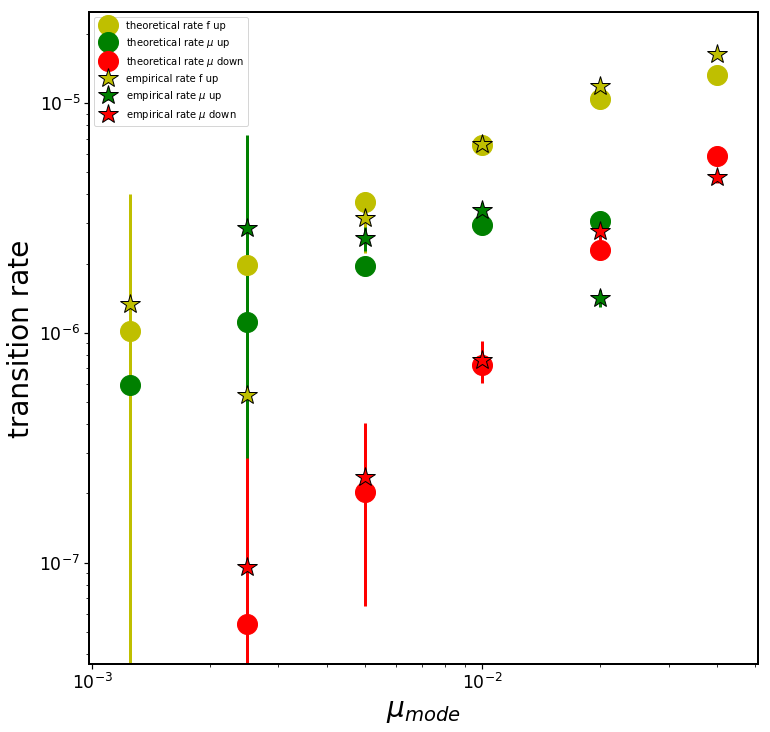

In [36]:
fig = plt.figure(figsize=(12,12));
ax = fig.add_subplot(111);
plot_transition_rates(ax, m0edf, stdm0edf, f0edf, stdf0edf, p0_theor_results)
plt.savefig('sweep_example1_transition_rates.pdf')

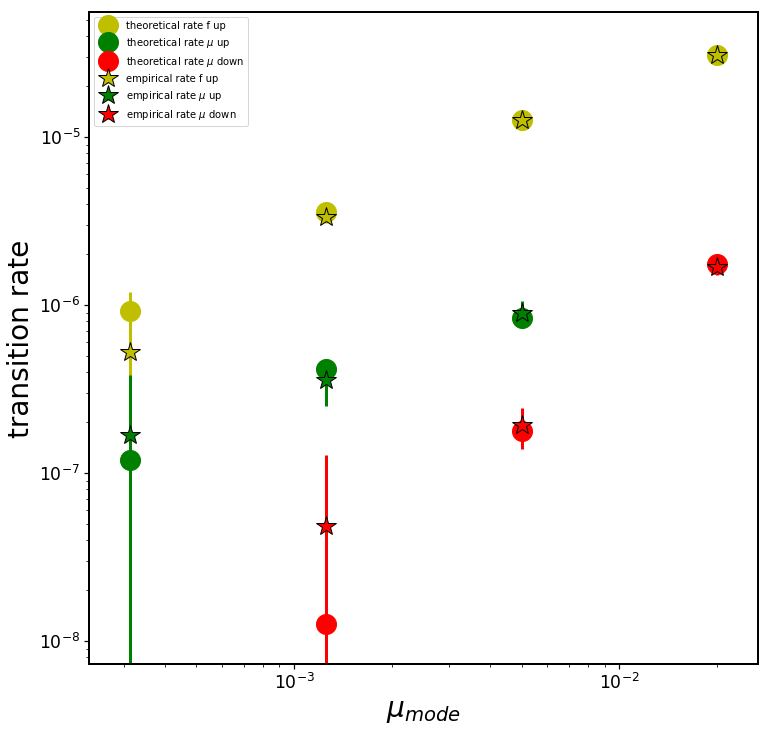

In [37]:
fig = plt.figure(figsize=(12,12));
ax = fig.add_subplot(111);
plot_transition_rates(ax, m1edf, stdm1edf, f1edf, stdf1edf, p1_theor_results)
plt.savefig('sweep_example2_transition_rates.pdf')

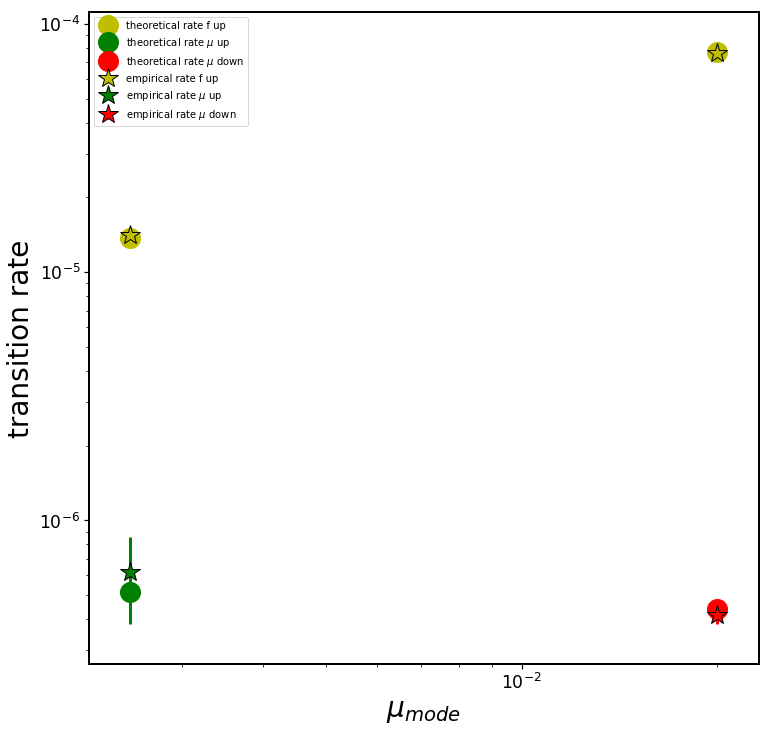

In [38]:
fig = plt.figure(figsize=(12,12));
ax = fig.add_subplot(111);
plot_transition_rates(ax, m2edf, stdm2edf, f2edf, stdf2edf, p2_theor_results)
plt.savefig('sweep_example3_transition_rates.pdf')

# Plots of the distribution of the mode of the mutation rate over time, simulation vs. theory

In [39]:
def mus_to_mudist(mus):
    mus_v = np.unique(mus)
    mudist = np.zeros_like(mus_v,dtype='int64')
    for i, mu in enumerate(mus_v):
        mudist[i] = np.sum(mus==mu)
    return mus_v, mudist/np.sum(mudist)


def mean_std_mu_dists(mu_dists):
    mu_dists_s = []
    for mu_dist in  mu_dists:
        mu_dists_s.append(pd.Series(mu_dist[1], mu_dist[0]))
    N = len(mu_dists_s)
    whole_index = mu_dists_s[0].index
    for i in range(1, N):
        whole_index = whole_index.union(mu_dists_s[i].index)
    for i in range(1, N):
        mu_dists_s[i]=(mu_dists_s[i]).reindex(index=whole_index, fill_value=0)
    mu_dist_total = 0
    mu_dist_total2 = 0
    for mu_dist in mu_dists_s:
        mu_dist_total = mu_dist_total + mu_dist
        mu_dist_total2 = mu_dist_total2 + mu_dist**2
    mean_mu_dist = mu_dist_total/N
    mean_squared_mu_dist = mu_dist_total2/N
    std_mu_dist = np.sqrt(mean_squared_mu_dist - mean_mu_dist**2)
    return mean_mu_dist.dropna(), std_mu_dist.dropna()/np.sqrt(N)


def bar_plot_mudist_com(ax, mudist_m, mudist_std, mudist_th):
    mus_v = mudist_m.index
    prob = mudist_m.values
    yerr = mudist_std.values
    ind = np.arange(mus_v.size)
    bar_width = .4
    ax.bar(ind + bar_width, prob, yerr=yerr, width=bar_width,
           color='red', label='empirical distribution  of $\mu_{mode}$')
    ax.bar(ind, mudist_th, color='blue', width=bar_width,
           label='theoretical distribution of $\mu_{mode}$')
    ax.set_xticks(ind);
    ax.set_xticklabels(['{:.2g}'.format(mu) for mu in mus_v], rotation=0);
    ax.legend()

In [40]:
mu_dists = {}

for p in ['p0', 'p1', 'p2']:
    mu_dists[p]=[]

for run in sweeps_p0:
    try:
        mudist = mus_to_mudist(run.mode_mutation_rate[:])
        mu_dists['p0'].append(mudist)
    except KeyError:
        pass

for run in sweeps_p1:
    try:
        mudist = mus_to_mudist(run.mode_mutation_rate[:])
        mu_dists['p1'].append(mudist)
    except KeyError:
        pass

for run in sweeps_p2:
    try:
        mudist = mus_to_mudist(run.mode_mutation_rate[:])
        mu_dists['p2'].append(mudist)
    except KeyError:
        pass

In [41]:
p0_th = SAF.steady_state(p0_theor_results[0].values)[-4:]
p1_th = SAF.steady_state(p1_theor_results[0].values)[-3:]
p2_th = SAF.steady_state(p2_theor_results[0].values)[-2:]

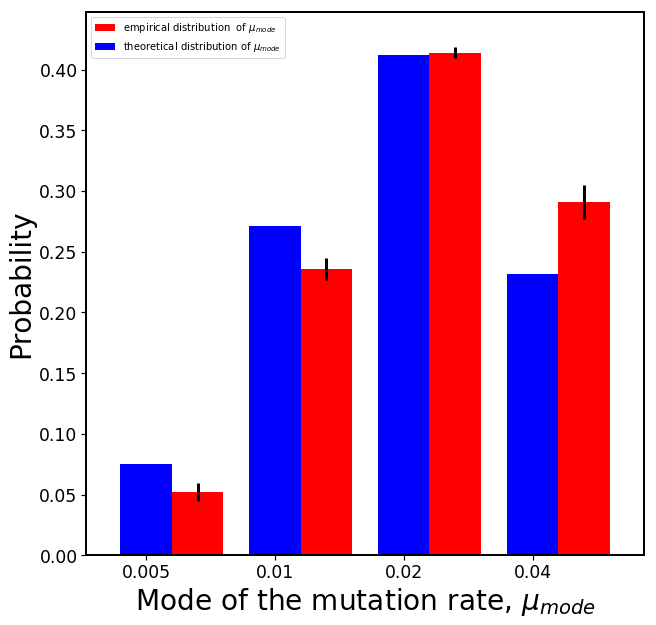

In [42]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
bar_plot_mudist_com(ax, *mean_std_mu_dists(mu_dists['p0']), p0_th)
ax.set_xlabel('Mode of the mutation rate, $\mu_{mode}$', fontsize=28)
ax.set_ylabel('Probability', fontsize=28)
plt.savefig('sweep_example1_mu_mode_distribution.pdf')

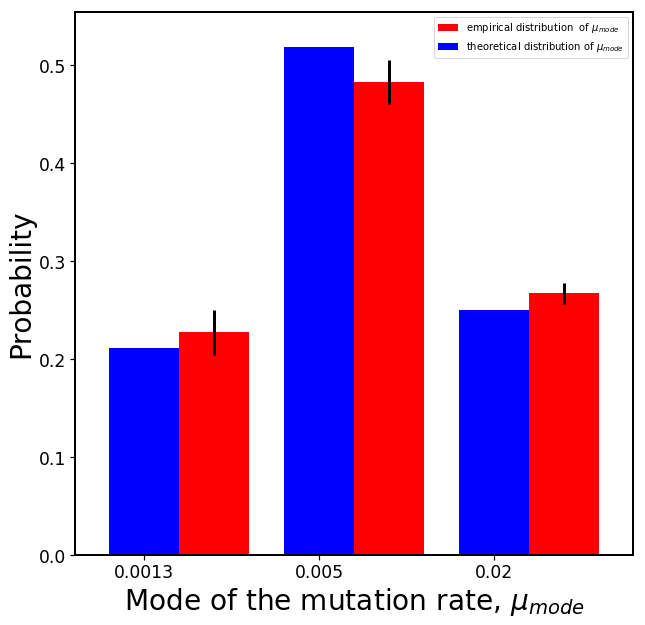

In [43]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
bar_plot_mudist_com(ax, *mean_std_mu_dists(mu_dists['p1']), p1_th)
ax.set_xlabel('Mode of the mutation rate, $\mu_{mode}$', fontsize=28)
ax.set_ylabel('Probability', fontsize=28)
plt.savefig('sweep_example2_mu_mode_distribution.pdf')

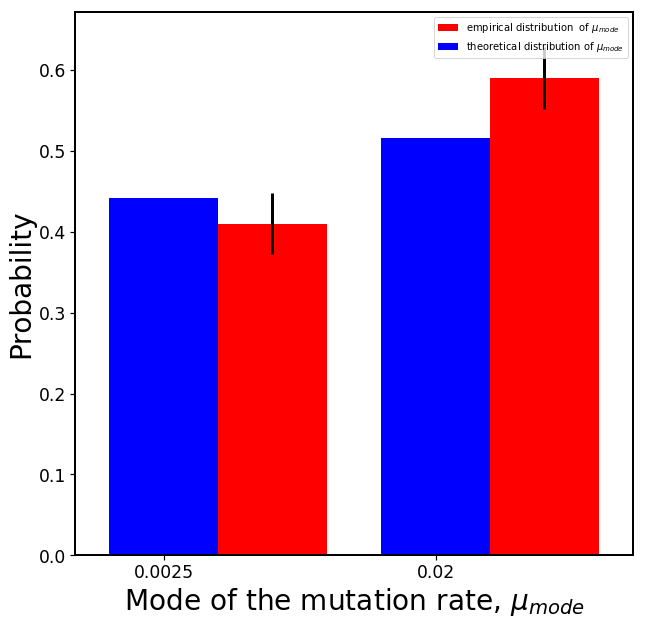

In [44]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
bar_plot_mudist_com(ax, *mean_std_mu_dists(mu_dists['p2']), p2_th)
ax.set_xlabel('Mode of the mutation rate, $\mu_{mode}$', fontsize=28)
ax.set_ylabel('Probability', fontsize=28)
plt.savefig('sweep_example3_mu_mode_distribution.pdf')